In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py,sys,getopt,os,random
import matplotlib.pyplot as plt 
from distinct_colours import get_distinct
from colourmaps import cm_linear,cm_plusmin

#from readsnap import readsnap

In [2]:
with h5py.File("snapshot_860.hdf5",'r') as snap:
    mass = snap['PartType0/Masses'][...]
    coords = snap['PartType0/Coordinates'][...]
    
    smasses= snap['PartType4/Masses'][...]
    scoords = snap['PartType4/Coordinates'][...]

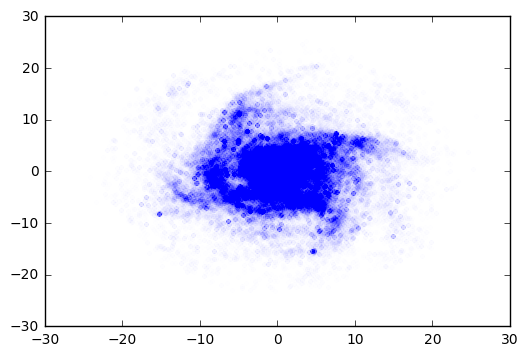

In [3]:
plt.plot(scoords[:,0],scoords[:,1],'.',alpha=0.002)

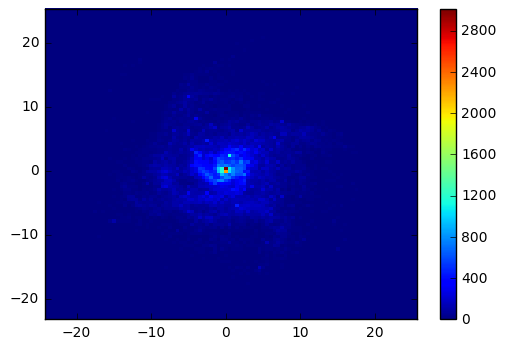

In [4]:
plt.hist2d(scoords[:,0],scoords[:,1],bins=100)
plt.colorbar()
print

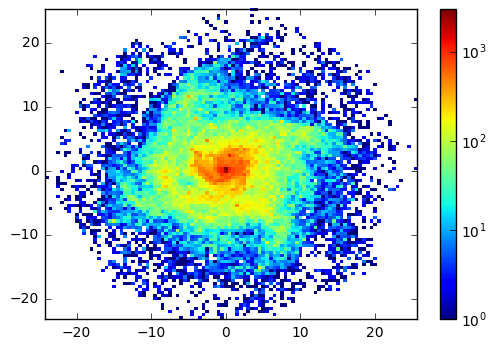

In [5]:
from matplotlib.colors import LogNorm
norm=LogNorm()
plt.hist2d(scoords[:,0],scoords[:,1],bins=100,norm=norm)
plt.colorbar()
print

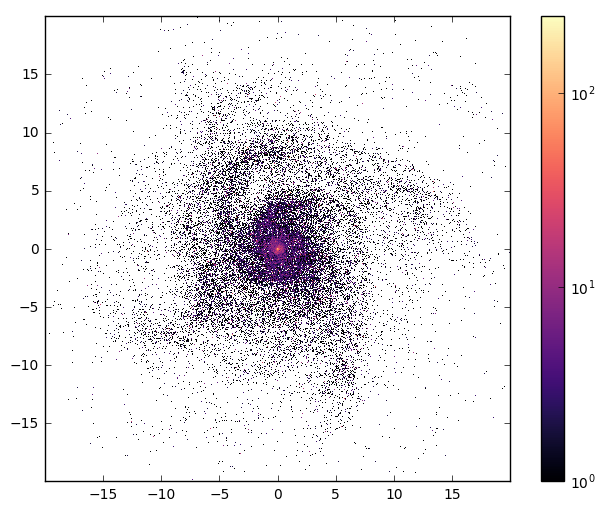

In [6]:
from matplotlib.colors import LogNorm
norm=LogNorm()

indices=np.logical_and(scoords[:,0]**2. < 20**2,scoords[:,1]**2. < 20**2)
h,xedges,yedges=np.histogram2d(scoords[:,0][indices],scoords[:,1][indices],bins=1000)
    
plt.gcf().set_size_inches(8,6)
plt.imshow(h,norm=norm,cmap='magma',extent=[min(xedges),max(xedges),min(yedges),max(yedges)],interpolation='none')
plt.colorbar()
print

In [7]:
def plot_gas_particles():
    fig,axs=plt.subplots(5,1)
    
    #plot the scatter plot
    ax=axs[0]
    ax.plot(coords[:,0],coords[:,1],'.',alpha=0.01)
    ax.set_title("Scatter Plot")
    
    #plot the bad 2d histogram
    ax=axs[1]
    h,x,y,p=ax.hist2d(coords[:,0],coords[:,1],bins=100)
    #plt.colorbar(h,ax=ax)
    ax.set_title("Default 2d Histogram")
    
    #plot the log normed
    ax=axs[2]
    norm=LogNorm()
    h,x,y,p=ax.hist2d(coords[:,0],coords[:,1],bins=100,norm=norm)
    #plt.colorbar(h,ax=ax)
    
    #plot the pretty one
    ax=axs[3]
    
    indices=np.logical_and(coords[:,0]**2. < 20**2,coords[:,1]**2. < 20**2)
    h,xedges,yedges=np.histogram2d(coords[:,0][indices],coords[:,1][indices],bins=100)
    #h,xedges,yedges=np.histogram2d(coords[:,0],coords[:,1],bins=1000)
    ax.set_title("Log Normed")

   
    cax=ax.imshow(h.T,norm=norm,cmap='magma',extent=[min(xedges),max(xedges),min(yedges),max(yedges)],origin='lower')
    plt.colorbar(cax,ax=ax)
    ax.set_ylim(-20,20)
    ax.set_xlim(-20,20)
    
    #weight by particle mass
    ax=axs[4]
    indices=np.logical_and(coords[:,0]**2. < 20**2,coords[:,1]**2. < 20**2)
    h,xedges,yedges=np.histogram2d(coords[:,0][indices],coords[:,1][indices],bins=100,weights=mass[indices]*1e10)
    ax.set_title("Mass Weighted")
   
    cax=ax.imshow(h.T,cmap='magma',extent=[min(xedges),max(xedges),min(yedges),max(yedges)],origin='lower')
    plt.colorbar(cax,ax=ax)
    ax.set_ylim(-20,20)
    ax.set_xlim(-20,20)
    fig.set_size_inches(4,4*5)

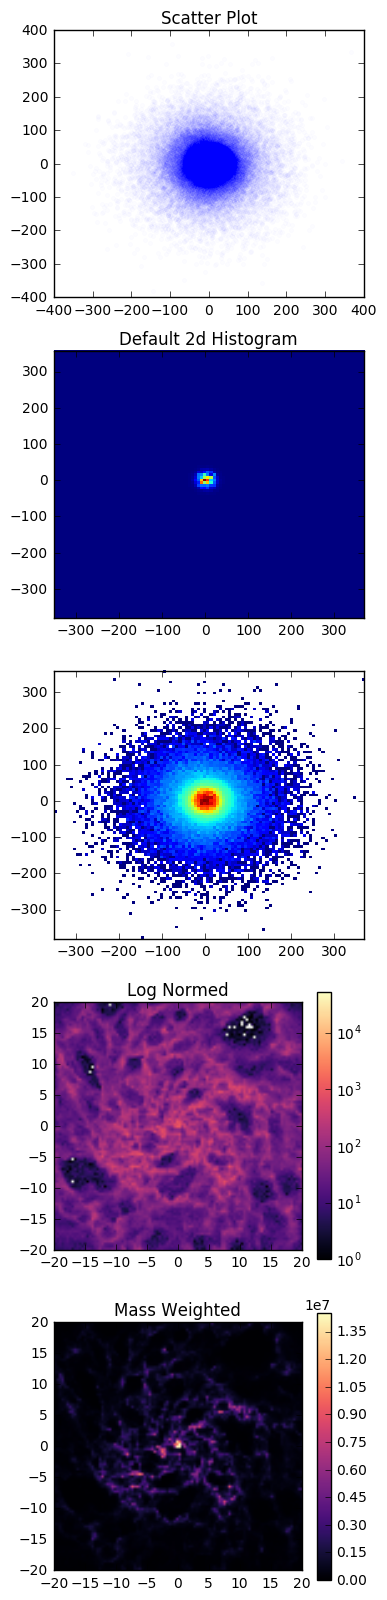

In [8]:
plot_gas_particles()

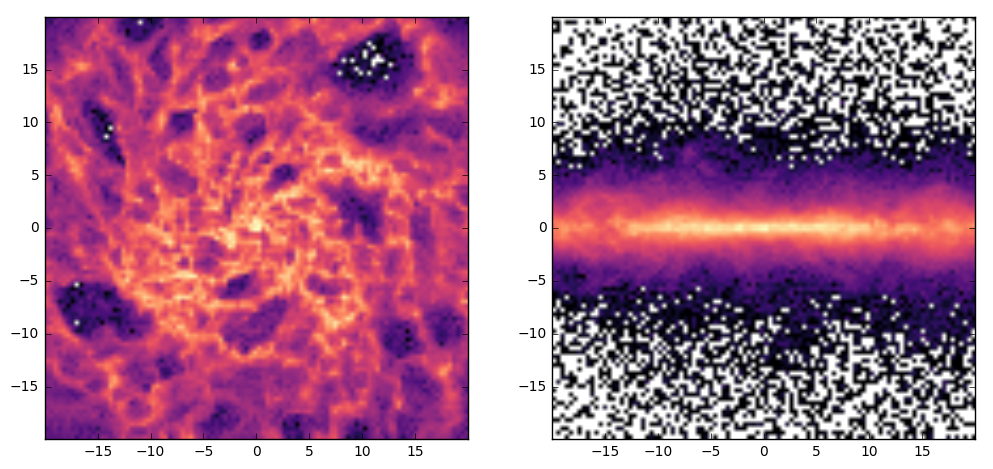

In [9]:
def twoDHist(ax,xs,ys,bins,weights=None,norm='',cbar=0):
    if norm=='':
        from matplotlib.colors import LogNorm
        norm=LogNorm()
    cmap=plt.get_cmap('magma')
    h,xedges,yedges=np.histogram2d(xs,ys,weights=weights,bins=bins)
    ax.imshow(h.T,cmap=cmap,origin='lower',
    norm=norm,extent=[min(xedges),max(xedges),min(yedges),max(yedges)])
    if cbar:
        plt.colorbar()
    return h,xedges,yedges


def plotSideBySide(rs,rcom,indices):
    fig,[ax1,ax2]=plt.subplots(1,2)
    xs,ys,zs = (rs[indices]-rcom).T
    twoDHist(ax1,xs,ys,bins=100)
    twoDHist(ax2,xs,zs,bins=100)
    fig.set_size_inches(12,6)
    #nameAxes(ax1,None,'x (kpc)','y (kpc)')
    #nameAxes(ax2,None,'x (kpc)','z (kpc)')
    return ax1,ax2

indices=np.logical_and(coords[:,0]**2. < 20**2,coords[:,1]**2. < 20**2)
indices=np.logical_and(indices,coords[:,2]**2 < 20**2)
plotSideBySide(coords,np.zeros(3),indices)
print